<a href="https://colab.research.google.com/github/Amal-Emad/Gulf_CarsPlates/blob/main/car%26platesFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**STEP I ::SPLIT THE LABEL IMG FOLDER TO  IMAGES AND LABELS FOLDERS,       COPY IMAGES ,AND TAKE A SAMPLE OF 100 IMG**

In [ ]:
import os
import shutil

src_dir = '/home/amal-alkraimeen/Desktop/Amal'

trg_img_dir = '/home/amal-alkraimeen/Desktop/CAR&PLATE/car&plate_code/samples/trg_sample_img'
trg_lbl_dir = '/home/amal-alkraimeen/Desktop/CAR&PLATE/car&plate_code/samples/trg_sample_label'
os.makedirs(trg_img_dir, exist_ok=True)
os.makedirs(trg_lbl_dir, exist_ok=True)

all_files = os.listdir(src_dir)

img_extensions = ['.png', '.jpg']
label_extensions = ['.txt', '.yolo']

img_files = [file for file in all_files if os.path.splitext(file)[1].lower() in img_extensions]

sample_img_files = []
for img_file in img_files:
    base_name = os.path.splitext(img_file)[0]
    label_exists = False


    for ext in label_extensions:
        lbl_file = base_name + ext
        if os.path.exists(os.path.join(src_dir, lbl_file)):
            label_exists = True
            break

    if label_exists:
        sample_img_files.append(img_file)
        if len(sample_img_files) == 100:
            break

for img_file in sample_img_files:
    src_img_path = os.path.join(src_dir, img_file)
    trg_img_path = os.path.join(trg_img_dir, img_file)

    shutil.copy2(src_img_path, trg_img_path)

    base_name = os.path.splitext(img_file)[0]

    for ext in label_extensions:
        lbl_file = base_name + ext
        src_lbl_path = os.path.join(src_dir, lbl_file)
        if os.path.exists(src_lbl_path):
            trg_lbl_path = os.path.join(trg_lbl_dir, lbl_file)
            shutil.copy2(src_lbl_path, trg_lbl_path)

print(f"Copied {len(os.listdir(trg_img_dir))} image files and corresponding label files.")



#**STEP II ::SPLIT THE IMAGES AND LABELS TO TRAIN AND TEST FOLDERS**

In [ ]:
'''
1. Copy images and labels into new directories, ensuring the process is correct.
2. Split the data (images and labels) into training and testing sets.
3. Create a main directory structure:
    - MAIN
        - CARS
            - IMAGES
                - TRAIN
                - TEST
            - LABELS
                - TRAIN
                - TEST
        - PLATES
            - IMAGES
                - TRAIN
                - TEST
            - LABELS
                - TRAIN
                - TEST
'''

import os
import shutil
import random

# Paths
src_img_dir = '/home/amal-alkraimeen/Desktop/CAR&PLATE/car&plate_code/samples/trg_sample_img'
src_lbl_dir = '/home/amal-alkraimeen/Desktop/CAR&PLATE/car&plate_code/samples/trg_sample_label'
main_dir = '/home/amal-alkraimeen/Desktop/CAR&PLATE/car&plate_code/Copied'

# Step 2:(80% train, 20% test)
img_files = os.listdir(src_img_dir)
lbl_files = os.listdir(src_lbl_dir)
combined_files = list(zip(img_files, lbl_files))
random.shuffle(combined_files)
split_index = int(0.8 * len(combined_files))
train_files = combined_files[:split_index]
test_files = combined_files[split_index:]

# Step 3:Create the main directory structure
os.makedirs(os.path.join(main_dir, 'cars', 'images', 'train'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'cars', 'images', 'test'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'cars', 'labels', 'train'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'cars', 'labels', 'test'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'plates', 'images', 'train'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'plates', 'images', 'test'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'plates', 'labels', 'train'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'plates', 'labels', 'test'), exist_ok=True)

# Move files to their dirs
for img_file, lbl_file in train_files:
    shutil.copy2(os.path.join(src_img_dir, img_file), os.path.join(main_dir, 'cars', 'images', 'train', img_file))
    shutil.copy2(os.path.join(src_lbl_dir, lbl_file), os.path.join(main_dir, 'cars', 'labels', 'train', lbl_file))

for img_file, lbl_file in test_files:
    shutil.copy2(os.path.join(src_img_dir, img_file), os.path.join(main_dir, 'cars', 'images', 'test', img_file))
    shutil.copy2(os.path.join(src_lbl_dir, lbl_file), os.path.join(main_dir, 'cars', 'labels', 'test', lbl_file))

print("Data has been split into training and testing sets.")


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 650.1 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

#**STEP III ::MODELING**

#**- VEHICLE_DETECT**

In [ ]:
import os
from ultralytics import YOLO
from PIL import Image

# ======================================================================================
# This script processes images in a specified directory using a pretrained YOLOv8 model.
# It performs the following steps:
# 1. Initializes the YOLOv8 model.
# 2. Defines the paths for images, labels, and cropped images.
# 3. Creates directories for labels and cropped images if they do not exist.
# 4. Tracks corrupted or invalid images.
# 5. Processes each image in the directory:
#    - Verifies image integrity.
#    - Makes predictions using the pretrained model.
#    - Saves detection results (bounding boxes and class) in YOLO format.
#    - Crops detected objects and saves cropped images.
# 6. Deletes corrupted images.
# ======================================================================================


vehicle_model = YOLO("/content/drive/MyDrive/CAR&PLATE/vehicle_detection.pt")

image_dir = "/content/drive/MyDrive/CAR&PLATE/new/output_jpeg"
label_dir = "/content/drive/MyDrive/CAR&PLATE/new/label_dir"
cropped_dir = "/content/drive/MyDrive/CAR&PLATE/new/cropped_dir"


os.makedirs(label_dir, exist_ok=True)
os.makedirs(cropped_dir, exist_ok=True)


corrupted_images = []


image_counter = 0
label_counter = 0


for img_file in os.listdir(image_dir):
    if img_file.lower().endswith((".jpg", ".png")):
        img_path = os.path.join(image_dir, img_file)


        try:
            img = Image.open(img_path)
            img.verify()
        except (IOError, SyntaxError):
            corrupted_images.append(img_path)
            print(f"Skipping corrupted image: {img_path}")
            continue


        try:

            results = vehicle_model.predict(img_path)

            label_file_path = os.path.join(label_dir, f"label_{label_counter}.txt")
            label_counter += 1

            with open(label_file_path, "w") as label_file:
                for idx, box in enumerate(results[0].boxes.xyxy):
                    category = int(results[0].boxes.cls[idx].item())
                    xmin, ymin, xmax, ymax = map(int, box)

                    with open(label_file_path, "a") as label_file:
                        label_file.write(f"{category} {xmin} {ymin} {xmax} {ymax}\n")

                    image = Image.open(img_path)
                    cropped_img = image.crop((xmin, ymin, xmax, ymax)).convert("RGB")
                    cropped_img_filename = f"crop_{image_counter}.jpg"
                    cropped_img.save(os.path.join(cropped_dir, cropped_img_filename))
                    image_counter += 1


                    img_width, img_height = image.size
                    x_center = (xmin + xmax) / 2.0 / img_width
                    y_center = (ymin + ymax) / 2.0 / img_height
                    width = (xmax - xmin) / img_width
                    height = (ymax - ymin) / img_height


                    with open(label_file_path, "a") as label_file:
                        label_file.write(f"{category} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        except Exception as e:
            print(f"Error processing image {img_file}: {e}")

for corrupt_img in corrupted_images:
    try:
        os.remove(corrupt_img)
        print(f"Removed corrupted image: {corrupt_img}")
    except Exception as e:
        print(f"Failed to remove image {corrupt_img}: {e}")



image 1/1 /content/drive/MyDrive/CAR&PLATE/new/output_jpeg/cda2d39ad83403269b251ea031053ac19862219eebfd9c522b1e5531ce3de467.jpg.jpg: 640x480 3 vehicles, 592.3ms
Speed: 14.2ms preprocess, 592.3ms inference, 29.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/CAR&PLATE/new/output_jpeg/6b213c9795e56791c8f142d168634a4cc2ac89383fac7183715cfb0efc04ce19.jpg.jpg: 640x384 1 vehicle, 364.4ms
Speed: 2.4ms preprocess, 364.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /content/drive/MyDrive/CAR&PLATE/new/output_jpeg/cc12e019ec737fba22b4d0ae582f74ed754a9d12920de2f0ba23a3b8adb976db.jpg.jpg: 640x384 3 vehicles, 488.8ms
Speed: 2.4ms preprocess, 488.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /content/drive/MyDrive/CAR&PLATE/new/output_jpeg/143704d27d3cba8a39fa86bee2cd158d14d962efa2fcf936cbce3c6363254958.jpg.jpg: 480x640 7 vehicles, 671.3ms
Speed: 4.9ms preprocess, 671.3ms inference, 1.3ms postpro

#**- Plates_detect**

In [ ]:
import os
from ultralytics import YOLO
from PIL import Image

cropped_dir = "/content/drive/MyDrive/CAR&PLATE/new/cropped_dir"
output_plate = '/content/drive/MyDrive/CAR&PLATE/Plate_new/platesIMG'
plate_model = '/content/drive/MyDrive/CAR&PLATE/licensePlate.pt'
Platlabel = '/content/drive/MyDrive/CAR&PLATE/Plate_new/plateLabel'

if not os.path.exists(output_plate):
    os.makedirs(output_plate)

model = YOLO(plate_model)
corrupted_images = []

image_counter = 0
label_counter = 0

for img_file in os.listdir(cropped_dir):
    if img_file.lower().endswith((".jpg", ".png")):
        img_path = os.path.join(cropped_dir, img_file)

        try:
            img = Image.open(img_path)
            img.verify()
        except (IOError, SyntaxError):
            corrupted_images.append(img_path)
            print(f"Skipping corrupted image: {img_path}")
            continue

        try:
            results = model.predict(img_path)

            label_file_path = os.path.join(Platlabel, f"label_{label_counter}.txt")
            label_counter += 1

            with open(label_file_path, "w") as label_file:
                for idx, box in enumerate(results[0].boxes.xyxy):
                    category = int(results[0].boxes.cls[idx].item())
                    xmin, ymin, xmax, ymax = map(int, box)

                    label_file.write(f"{category} {xmin} {ymin} {xmax} {ymax}\n")

                    cropped_img = img.crop((xmin, ymin, xmax, ymax)).convert("RGB")
                    cropped_img_filename = f"crop_{image_counter}.jpg"
                    cropped_img.save(os.path.join(output_plate, cropped_img_filename))
                    image_counter += 1

                    img_width, img_height = img.size
                    x_center = (xmin + xmax) / 2.0 / img_width
                    y_center = (ymin + ymax) / 2.0 / img_height
                    width = (xmax - xmin) / img_width
                    height = (ymax - ymin) / img_height

                    label_file.write(f"{category} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        except Exception as e:
            print(f"Error processing image {img_file}: {e}")

for corrupt_img in corrupted_images:
    try:
        os.remove(corrupt_img)
        print(f"Removed corrupted image: {corrupt_img}")
    except Exception as e:
        print(f"Failed to remove image {corrupt_img}: {e}")


# **- VISUALIZING**

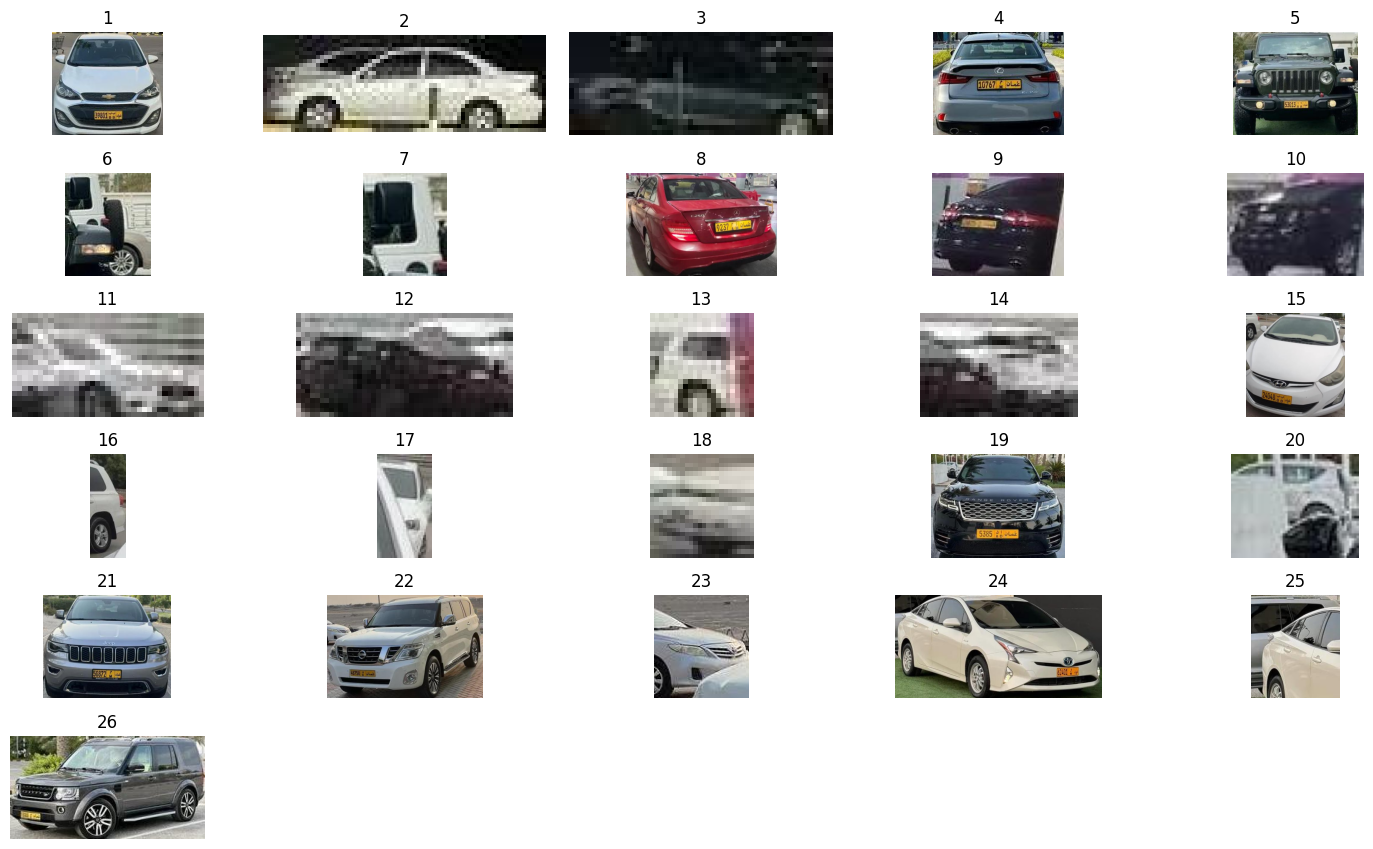

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

directory = '/content/drive/MyDrive/CAR&PLATE/new/cropped_dir'
files = [file for file in os.listdir(directory) if file.endswith(('.jpg', '.png'))]


files = files[:33]


cols = 5
rows = 7

plt.figure(figsize=(15, 10))
m=0
for i, file_name in enumerate(files):
    image_path = os.path.join(directory, file_name)
    image = cv2.imread(image_path)
    m+=1
    if image is not None:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title(m)

plt.tight_layout()
plt.show()


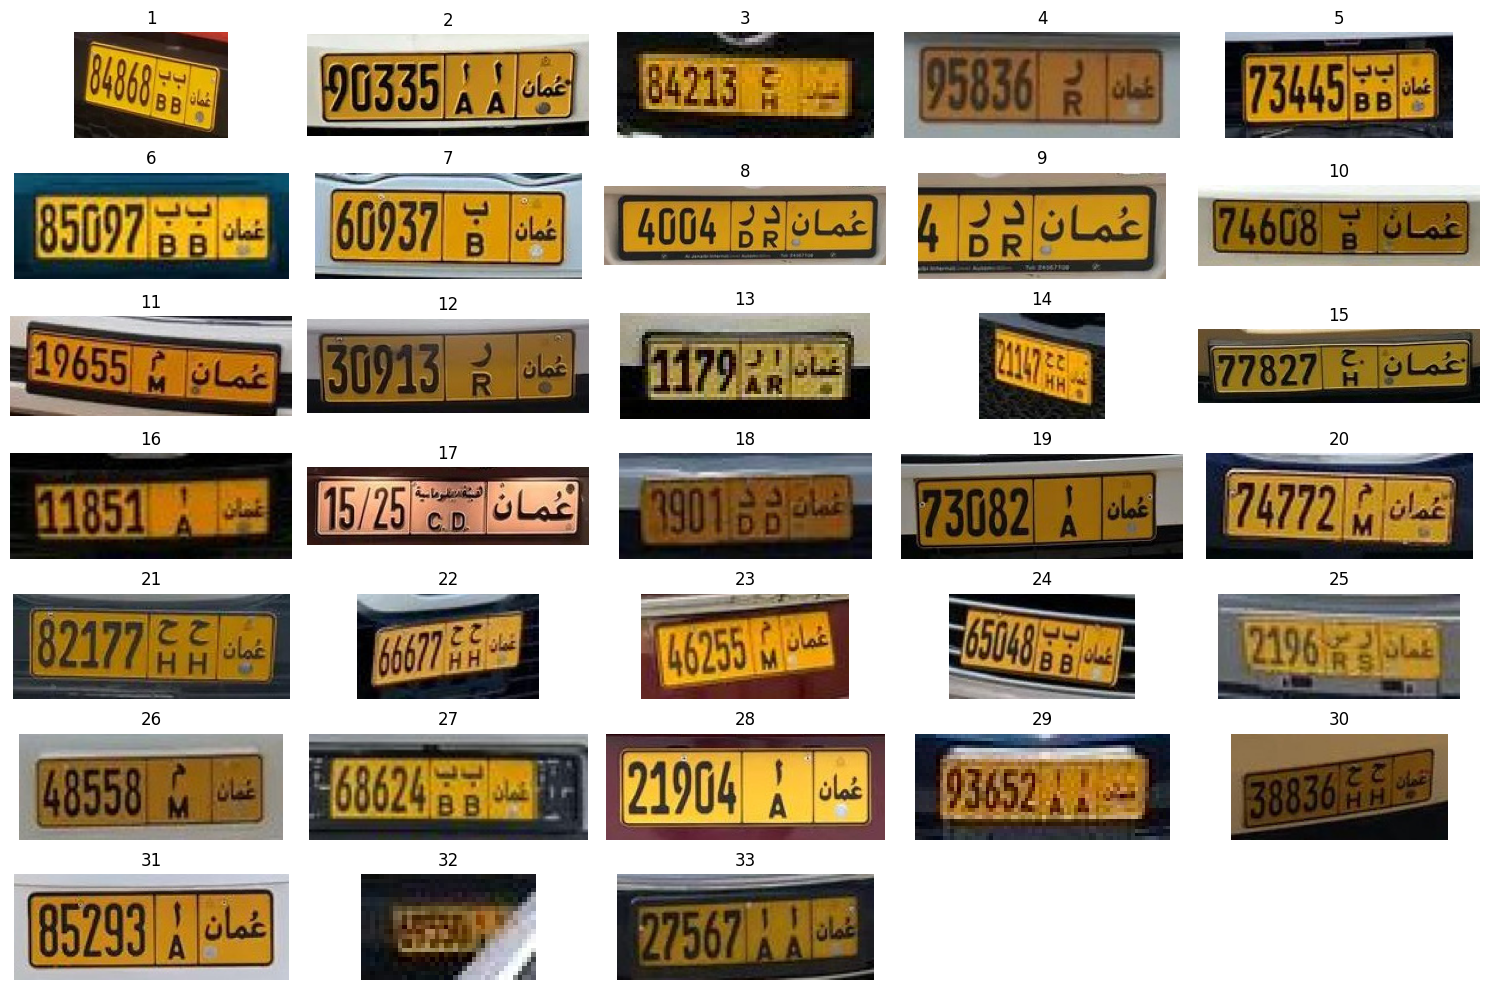

In [ ]:
directory ='/content/drive/MyDrive/CAR&PLATE/Plate_new/platesIMG''
files = [file for file in os.listdir(directory) if file.endswith(('.jpg', '.png' , '.jpeg'))]


files = files[:33]


cols = 5
rows = 7

plt.figure(figsize=(15, 10))
m=0
for i, file_name in enumerate(files):
    image_path = os.path.join(directory, file_name)
    image = cv2.imread(image_path)
    m+=1
    if image is not None:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title(m)

plt.tight_layout()
plt.show()
